In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df_311 = pd.read_csv('fhrw-4uyv.csv')

In [3]:
df_311.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-08-17T17:06:01.000,47277816,PLUMBING,10468.0,95 WEST 195 STREET,WEST 195 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.869953,-73.899488,NaN,RESIDENTIAL BUILDING,Open
1,2020-08-17T10:12:47.000,47277264,PAINT/PLASTER,10303.0,55 HOLLAND AVENUE,HOLLAND AVENUE,ADDRESS,STATEN ISLAND,The following complaint conditions are still o...,STATEN ISLAND,40.638992,-74.171244,NaN,RESIDENTIAL BUILDING,Open
2,2020-08-17T13:47:57.000,47273051,WATER LEAK,11225.0,135 OCEAN AVENUE,OCEAN AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.659590,-73.962656,NaN,RESIDENTIAL BUILDING,Open
3,2020-08-17T12:56:24.000,47275668,ELECTRIC,10075.0,337 EAST 77 STREET,EAST 77 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.771623,-73.955048,NaN,RESIDENTIAL BUILDING,Open
4,2020-08-17T10:31:06.000,47274700,UNSANITARY CONDITION,10019.0,37 WEST 54 STREET,WEST 54 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.761600,-73.976684,NaN,RESIDENTIAL BUILDING,Open


In [4]:
# check if any na values
df_311.isnull().sum()

created_date                    0
unique_key                      0
complaint_type                  0
incident_zip                80738
incident_address            52831
street_name                 52831
address_type                84752
city                        80310
resolution_description       7824
borough                         0
latitude                  2830524
longitude                 2830524
closed_date                132816
location_type               52830
status                          0
dtype: int64

In [5]:
# Top ten complaint types based on total number of complaints
df_311['complaint_type'].value_counts().head(10)

HEAT/HOT WATER          1320668
HEATING                  887869
PLUMBING                 728591
GENERAL CONSTRUCTION     500863
UNSANITARY CONDITION     480042
PAINT - PLASTER          361257
PAINT/PLASTER            360806
ELECTRIC                 316171
NONCONST                 260890
DOOR/WINDOW              215970
Name: complaint_type, dtype: int64

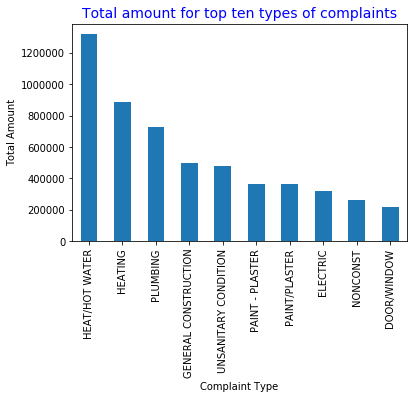

In [6]:
# Total amount for top ten types of complaints 
plt.figure(figsize = (6,4))
df_311['complaint_type'].value_counts()[:10].plot(kind = 'bar')
plt.xlabel('Complaint Type')
plt.ylabel('Total Amount')
plt.title('Total amount for top ten types of complaints', fontsize = 14, color ='b')
plt.show()

In [7]:
# convert 'created_date' to datetime type
df_311['created_date'] = pd.to_datetime(df_311['created_date'])

In [8]:
# create a new feature 'Year'
df_311['Year'] = df_311['created_date'].apply(lambda x: x.year)

In [9]:
df_TopFive = df_311[df_311['complaint_type'].isin(['HEAT/HOT WATER','HEATING','PLUMBING','GENERAL CONSTRUCTION','UNSANITARY CONDITION'])]\
.groupby(['Year','complaint_type']).count()['unique_key']
df_TopFive

Year  complaint_type      
2010  GENERAL CONSTRUCTION    127131
      HEATING                 214218
      PLUMBING                111504
2011  GENERAL CONSTRUCTION    133242
      HEATING                 190184
      PLUMBING                113218
2012  GENERAL CONSTRUCTION    112436
      HEATING                 182974
      PLUMBING                 87561
2013  GENERAL CONSTRUCTION    112169
      HEATING                 202896
      PLUMBING                 86564
2014  GENERAL CONSTRUCTION     15885
      HEAT/HOT WATER          132767
      HEATING                  97597
      PLUMBING                 63221
      UNSANITARY CONDITION     61789
2015  HEAT/HOT WATER          225706
      PLUMBING                 55418
      UNSANITARY CONDITION     82888
2016  HEAT/HOT WATER          227959
      PLUMBING                 52592
      UNSANITARY CONDITION     80469
2017  HEAT/HOT WATER          213521
      PLUMBING                 49969
      UNSANITARY CONDITION     79282
2018  HEAT/

Text(0.5, 1.0, 'Total amounts for the top five types of complaints from 2010 to 2020')

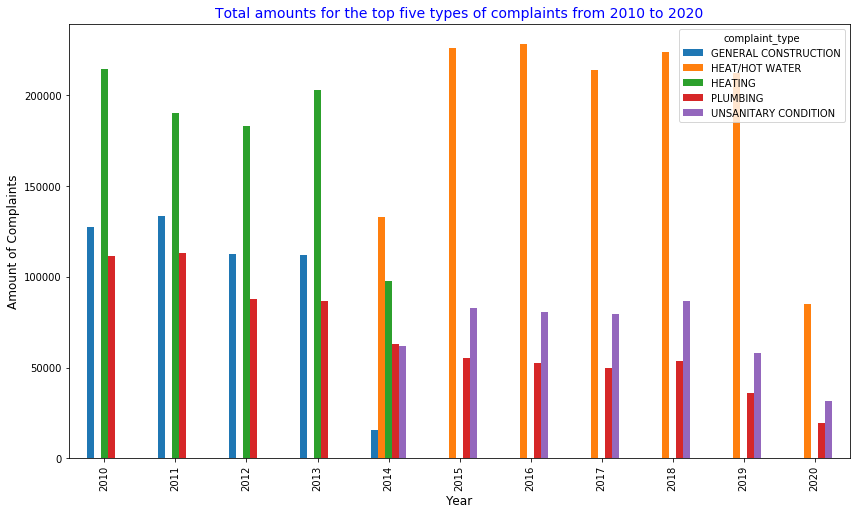

In [10]:
# plot total amounts for the top five types of complaints from 2010 to 2020
df_TopFive.unstack().plot(kind ='bar', figsize =(14,8))
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Amount of Complaints', fontsize =12)
plt.title('Total amounts for the top five types of complaints from 2010 to 2020', fontsize = 14, color ='b')

### The figure above shows that HEATING was the top complaint before 2014, and HEAT/HOT WATER is the top after 2014. 
### The fact that HEATING disappeared after 2014 indicates that it was probably renamed/included to HEAT/HOT WATER from 2015

In [11]:
# Replace "HEATING" with 'HEAT/HOT WATER' in df_311
df_311['complaint_type'] = np.where(df_311['complaint_type'] == 'HEATING', 'HEAT/HOT WATER', df_311['complaint_type'])

Text(0.5, 1.0, 'Total amount for top five types of complaints')

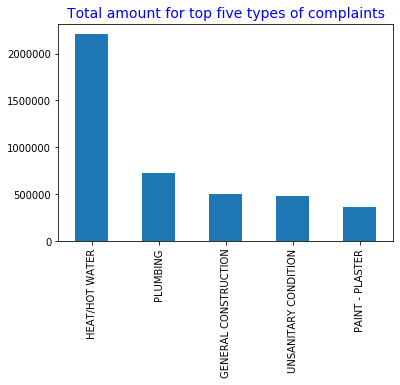

In [12]:
# plot out the top five complaint types after combining HEATING and HEAT/HOT WATER
df_311['complaint_type'].value_counts()[0:5].plot(kind = 'bar')
plt.title ('Total amount for top five types of complaints', fontsize = 14, color ='b')

### From the result above: HEAT/HOT WATER is the type that has the most total number of cases 
### Now let us check which type has the most OPEN cases

In [13]:
df_311[df_311['status'] == 'Open']['complaint_type'].value_counts().head(10)

GENERAL CONSTRUCTION    29623
PLUMBING                27045
PAINT - PLASTER         21647
NONCONST                15278
HEAT/HOT WATER          15154
ELECTRIC                 9859
UNSANITARY CONDITION     5226
APPLIANCE                4343
PAINT/PLASTER            2625
DOOR/WINDOW              1965
Name: complaint_type, dtype: int64

### Results above show 'GENERAL CONSTRUCTION' has the most OPEN cases. HEAT/HOT WATER has the fifth most OPEN cases even though it has the most total amount, indicating it is probably a problem with a easy/quick fix 
### Now let us look at the ratio of OPEN/TOTAL cases for each type 

In [14]:
# what are the types in the status column?
df_311['status'].value_counts()

Closed         6053215
Open            139420
In Progress        318
Assigned             4
Pending              2
Name: status, dtype: int64

In [15]:
# change all the 'Closed' to 1
df_311['status'] = np.where(df_311['status'] == 'Closed', 1, df_311['status'])

In [16]:
# change all the 'Open' including 'Open', 'In Progress', 'Assigned', 'Pending' to 0
df_311['status'] = np.where(df_311['status'].isin(['Open','In Progress','Assigned','Pending']), 0, df_311['status'])

In [17]:
df_open = df_311[df_311['status'] ==0]['complaint_type'].value_counts()
df_open

GENERAL CONSTRUCTION      29623
PLUMBING                  27045
PAINT - PLASTER           21647
NONCONST                  15278
HEAT/HOT WATER            15156
ELECTRIC                   9859
UNSANITARY CONDITION       5226
APPLIANCE                  4343
PAINT/PLASTER              2625
DOOR/WINDOW                1965
WATER LEAK                 1951
GENERAL                    1438
FLOORING/STAIRS            1341
HPD Literature Request     1080
SAFETY                      421
CONSTRUCTION                266
Unsanitary Condition        246
ELEVATOR                     87
OUTSIDE BUILDING             70
General                      50
Safety                       19
VACANT APARTMENT              5
Appliance                     2
Mold                          1
Name: complaint_type, dtype: int64

In [18]:
df_total = df_311.groupby('complaint_type').count()['unique_key']

In [19]:
df_summary = pd.merge(df_open, df_total, left_index = True, right_index = True)
df_summary

,complaint_type,unique_key
GENERAL CONSTRUCTION,29623,500863
PLUMBING,27045,728591
PAINT - PLASTER,21647,361257
NONCONST,15278,260890
HEAT/HOT WATER,15156,2208537
ELECTRIC,9859,316171
UNSANITARY CONDITION,5226,480042
APPLIANCE,4343,119114
PAINT/PLASTER,2625,360806
DOOR/WINDOW,1965,215970


In [20]:
#rename the columns 
df_summary = df_summary.rename(columns ={'complaint_type': 'Open_Cases_Amount', 'unique_key': 'Total_Amount'})

In [21]:
df_summary['OpenCaseRatio'] = df_summary['Open_Cases_Amount']/df_summary['Total_Amount']
df_summary.sort_values('Open_Cases_Amount', ascending = False)

,Open_Cases_Amount,Total_Amount,OpenCaseRatio
GENERAL CONSTRUCTION,29623,500863,0.059144
PLUMBING,27045,728591,0.037120
PAINT - PLASTER,21647,361257,0.059921
NONCONST,15278,260890,0.058561
HEAT/HOT WATER,15156,2208537,0.006862
ELECTRIC,9859,316171,0.031182
UNSANITARY CONDITION,5226,480042,0.010887
APPLIANCE,4343,119114,0.036461
PAINT/PLASTER,2625,360806,0.007275
DOOR/WINDOW,1965,215970,0.009098


### Table above shows that 'GENERAL CONSTRUCTION' has the most open cases and almost the highest OPEN/Total ratio (5%). Note that Mold, Appliance, Vacant Apartment have the highest open case ratio, but that is due to their extremly low total number of cases 

## QUESTION 1 CONCLUSION:
## Department of Housing Preservation and Development of NYC should address HEAT/HOT WATER complaints first. GENERAL CONSTRUCTION has the most OPEN cases, which should also be focused on.

In [22]:
df_311[df_311['complaint_type'] == 'HEAT/HOT WATER']['borough'].value_counts()

BRONX            628121
BROOKLYN         590956
MANHATTAN        436397
Unspecified      282917
QUEENS           251281
STATEN ISLAND     18865
Name: borough, dtype: int64

### BRONX is the borough that has most HEAT/HOT WATER complaints - total of 628121 cases

In [23]:
df_311[df_311['complaint_type'] == 'HEAT/HOT WATER']['incident_zip'].value_counts().head()

11226.0    70933
10467.0    67807
10458.0    67060
10468.0    59731
10453.0    59267
Name: incident_zip, dtype: int64

### 11226 is the zip code that has most HEAT/HOT WATER complaints - total of 70933 cases. From google map, 11226 actually is in a neighborhood called Flatbush in Brooklyn area. 

In [24]:
df_311[df_311['complaint_type'] == 'HEAT/HOT WATER']['street_name'].value_counts().head()

GRAND CONCOURSE    38958
BROADWAY           25036
OCEAN AVENUE       19244
MORRIS AVENUE      16649
ARDEN STREET       16113
Name: street_name, dtype: int64

### GRAND CONCOURSE is the street that has most HEAT/HOT WATER complaints - total of 38958 cases. From google map, GRAND CONCOURSE is actually a street in BRONX.

# QUESTION 2 CONCLUSION:
# Department of Housing Preservation and Development of NYC should focus on BRONX borough, 11226 zipcode area, and GRAND CONCOURSE street for HEAT/HOT WATER complaints.

### For QUESTION 3, I am going to build a model to predict the number of HEAT/HOT WATER complaints (in multiple ranges), based on the ADDRESS in BRONX. Main steps include merging two DataFrames - one lists Address and Total Number of HHW complaints (derived from df_311) and the other one lists Address and House Characterisitcs of the Address.

In [25]:
df_311.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status,Year
0,2020-08-17 17:06:01,47277816,PLUMBING,10468.0,95 WEST 195 STREET,WEST 195 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.869953,-73.899488,NaN,RESIDENTIAL BUILDING,0,2020
1,2020-08-17 10:12:47,47277264,PAINT/PLASTER,10303.0,55 HOLLAND AVENUE,HOLLAND AVENUE,ADDRESS,STATEN ISLAND,The following complaint conditions are still o...,STATEN ISLAND,40.638992,-74.171244,NaN,RESIDENTIAL BUILDING,0,2020
2,2020-08-17 13:47:57,47273051,WATER LEAK,11225.0,135 OCEAN AVENUE,OCEAN AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.659590,-73.962656,NaN,RESIDENTIAL BUILDING,0,2020
3,2020-08-17 12:56:24,47275668,ELECTRIC,10075.0,337 EAST 77 STREET,EAST 77 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.771623,-73.955048,NaN,RESIDENTIAL BUILDING,0,2020
4,2020-08-17 10:31:06,47274700,UNSANITARY CONDITION,10019.0,37 WEST 54 STREET,WEST 54 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.761600,-73.976684,NaN,RESIDENTIAL BUILDING,0,2020


In [26]:
# Create df_311_BX, which only includes BRONX borough 
df_311_BX = df_311[df_311['borough'] == 'BRONX']
df_311_BX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679523 entries, 0 to 6192957
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   created_date            1679523 non-null  datetime64[ns]
 1   unique_key              1679523 non-null  int64         
 2   complaint_type          1679523 non-null  object        
 3   incident_zip            1671414 non-null  float64       
 4   incident_address        1679522 non-null  object        
 5   street_name             1679522 non-null  object        
 6   address_type            1669611 non-null  object        
 7   city                    1671416 non-null  object        
 8   resolution_description  1677152 non-null  object        
 9   borough                 1679523 non-null  object        
 10  latitude                1075974 non-null  float64       
 11  longitude               1075974 non-null  float64       
 12  closed_date   

In [27]:
df_311_BX.isnull().sum()
# checking null values

created_date                   0
unique_key                     0
complaint_type                 0
incident_zip                8109
incident_address               1
street_name                    1
address_type                9912
city                        8107
resolution_description      2371
borough                        0
latitude                  603549
longitude                 603549
closed_date                28950
location_type                  0
status                         0
Year                           0
dtype: int64

## STEP 1: Data Cleaning and Wrangling to get a DataFrame that lists Address and total number of HHW complaints for BRONX

In [28]:
#drop null in incident_address(only one row), and check number of unique incident_address
df_311_BX.dropna(subset =['incident_address'], inplace = True)
df_311_BX['incident_address'].nunique() # BRONX has 27058 unique addresses that filed a complaint 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


27058

In [29]:
df_311_BX['incident_address'].value_counts().head()

1025 BOYNTON AVENUE        9787
3810 BAILEY AVENUE         7187
2176 TIEBOUT AVENUE        5128
3555 BRUCKNER BOULEVARD    4436
750 GRAND CONCOURSE        4227
Name: incident_address, dtype: int64

In [30]:
# put the results above to a DataFrame df_311_BX_addr, and rename the columns to Address and cnt (total # of complaints)
df_311_BX_addr = pd.DataFrame(df_311_BX['incident_address'].value_counts()).reset_index()
df_311_BX_addr.rename(columns ={'index': 'Address', 'incident_address': 'cnt'}, inplace = True)

In [31]:
df_311_BX_addr.head()

,Address,cnt
0,1025 BOYNTON AVENUE,9787
1,3810 BAILEY AVENUE,7187
2,2176 TIEBOUT AVENUE,5128
3,3555 BRUCKNER BOULEVARD,4436
4,750 GRAND CONCOURSE,4227


In [32]:
df_311_BX_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27058 entries, 0 to 27057
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  27058 non-null  object
 1   cnt      27058 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 422.9+ KB


In [33]:
# Extract out the rows in df_311_BX that has HHW complaints. 
# Note that the rows that had 0 HHW will be filtered out. We need to add them back later.
df_311_BX_HHW = df_311_BX[df_311_BX['complaint_type'] == 'HEAT/HOT WATER']
df_311_BX_HHW.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status,Year
12,2020-08-17 18:57:38,47276192,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,WOODYCREST AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.831527,-73.928863,NaN,RESIDENTIAL BUILDING,0,2020
66,2020-08-17 18:05:13,47277814,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,WOODYCREST AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.831527,-73.928863,NaN,RESIDENTIAL BUILDING,0,2020
68,2020-08-17 21:12:54,47275858,HEAT/HOT WATER,10455.0,366 EAST 154 STREET,EAST 154 STREET,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.819838,-73.917441,NaN,RESIDENTIAL BUILDING,0,2020
84,2020-08-17 10:12:59,47273032,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,WOODYCREST AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.831527,-73.928863,NaN,RESIDENTIAL BUILDING,0,2020
85,2020-08-17 01:06:02,47274740,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,WOODYCREST AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.831527,-73.928863,NaN,RESIDENTIAL BUILDING,0,2020


In [34]:
df_311_BX_HHW['incident_address'].value_counts()

3810 BAILEY AVENUE           7119
1025 BOYNTON AVENUE          5780
2176 TIEBOUT AVENUE          4083
2090 EAST TREMONT AVENUE     3837
2040 BRONXDALE AVENUE        3131
                             ... 
2715 CLAFLIN AVENUE             1
859 EAST 242 STREET             1
1741 ANDREWS AVENUE SOUTH       1
8 EAST GUN HILL ROAD            1
2068 VALENTINE AVENUE           1
Name: incident_address, Length: 21248, dtype: int64

In [35]:
# put the results above to a DataFrame
df_311_BX_HHW_cnt = pd.DataFrame(df_311_BX_HHW['incident_address'].value_counts()).reset_index()
df_311_BX_HHW_cnt.head()

,index,incident_address
0,3810 BAILEY AVENUE,7119
1,1025 BOYNTON AVENUE,5780
2,2176 TIEBOUT AVENUE,4083
3,2090 EAST TREMONT AVENUE,3837
4,2040 BRONXDALE AVENUE,3131


In [36]:
df_311_BX_HHW_cnt = df_311_BX_HHW_cnt.rename(columns ={'index': 'Address','incident_address': 'HHW_cnt'})
df_311_BX_HHW_cnt.head()

,Address,HHW_cnt
0,3810 BAILEY AVENUE,7119
1,1025 BOYNTON AVENUE,5780
2,2176 TIEBOUT AVENUE,4083
3,2090 EAST TREMONT AVENUE,3837
4,2040 BRONXDALE AVENUE,3131


In [37]:
df_311_BX_HHW_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21248 entries, 0 to 21247
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  21248 non-null  object
 1   HHW_cnt  21248 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 332.1+ KB


In [38]:
# Merge df_311_BX_addr and df_311_BX_HHW_cnt, and fillna to HHW_cnt column 
# (this is because Address with 0 HHW complaints were filtered out previously)
df_cnt = pd.merge(df_311_BX_addr,df_311_BX_HHW_cnt, on ='Address', how = 'outer' )
df_cnt.head()

,Address,cnt,HHW_cnt
0,1025 BOYNTON AVENUE,9787,5780.0
1,3810 BAILEY AVENUE,7187,7119.0
2,2176 TIEBOUT AVENUE,5128,4083.0
3,3555 BRUCKNER BOULEVARD,4436,1460.0
4,750 GRAND CONCOURSE,4227,2163.0


Note it is very important to get df_311_BX_addr since it keeps all the addresses that had 0 HHW complaint

In [39]:
df_cnt.isnull().sum()

Address       0
cnt           0
HHW_cnt    5810
dtype: int64

In [40]:
df_cnt['HHW_cnt'].fillna(0, inplace = True)

### df_cnt (address vs. total number of HHW complaints for BRONX) is ready for merge

## STEP 2: Data Cleaning and Wrangling to get a DataFrame that contains the housing characteristics of BRONX

In [41]:
BX = pd.read_csv('BX_18v1.csv', usecols=['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
                                         'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 
                                         'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord'])

In [42]:
BX.head()

,Lot,ZipCode,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1,10454.0,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5,1005957.0,232162.0
1,4,10454.0,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5,1006076.0,232156.0
2,10,10454.0,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5,1006187.0,232036.0
3,17,10454.0,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5,1006299.0,232033.0
4,18,10454.0,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5,1006363.0,232040.0


In [43]:
#replace invalid value of 0 in 'YearBuilt' column by the mean value 
BX['YearBuilt'] = np.where(BX['YearBuilt'] ==0, BX['YearBuilt'].mean(), BX['YearBuilt'])

In [44]:
# drop 'YearAlter1' since it has too many 0 values 
BX.drop(columns =['YearAlter1'], inplace = True)

In [45]:
BX.isnull().sum()

Lot              0
ZipCode        329
Address         69
LotArea          0
BldgArea         0
ResArea          0
OfficeArea       0
RetailArea       0
NumBldgs         0
NumFloors        0
LotDepth         0
BldgDepth        0
YearBuilt        0
BuiltFAR         0
ResidFAR         0
CommFAR          0
FacilFAR         0
XCoord        3259
YCoord        3259
dtype: int64

In [46]:
BX['Address'].value_counts()
# there are quite a few duplicates in 'Address'. 

SHORE DRIVE              42
PALISADE AVENUE          37
WHITE PLAINS ROAD        35
PARK AVENUE              35
BRUCKNER BOULEVARD       34
                         ..
1740 BOGART AVENUE        1
2305 MICKLE AVENUE        1
1520 ROSELLE STREET       1
2830 OLINVILLE AVENUE     1
2702 LATTING STREET       1
Name: Address, Length: 87017, dtype: int64

In [47]:
# remove duplicates in 'Address'
BX.drop_duplicates(subset =['Address'], inplace = True)

In [48]:
BX['Address'].value_counts()
# now there is no duplicates in'Address'

2869 PHILIP AVENUE         1
4511 MONTICELLO AVENUE     1
862 EAST 222 STREET        1
419 CASTLE HILL AVENUE     1
1008 RHINELANDER AVENUE    1
                          ..
109 BRUCKNER BOULEVARD     1
1421 EDWARDS AVENUE        1
486 MINNIEFORD AVENUE      1
4358 GRACE AVENUE          1
2702 LATTING STREET        1
Name: Address, Length: 87017, dtype: int64

In [49]:
BX.isnull().sum()

Lot              0
ZipCode         61
Address          1
LotArea          0
BldgArea         0
ResArea          0
OfficeArea       0
RetailArea       0
NumBldgs         0
NumFloors        0
LotDepth         0
BldgDepth        0
YearBuilt        0
BuiltFAR         0
ResidFAR         0
CommFAR          0
FacilFAR         0
XCoord        1312
YCoord        1312
dtype: int64

In [50]:
# drop rows with na values in 'Address' column 
BX.dropna(subset = ['Address'], inplace = True)

In [51]:
BX.isnull().sum()

Lot              0
ZipCode         61
Address          0
LotArea          0
BldgArea         0
ResArea          0
OfficeArea       0
RetailArea       0
NumBldgs         0
NumFloors        0
LotDepth         0
BldgDepth        0
YearBuilt        0
BuiltFAR         0
ResidFAR         0
CommFAR          0
FacilFAR         0
XCoord        1311
YCoord        1311
dtype: int64

## STEP3: Merge df_cnt and BX ON address according to BX

In [52]:
df = pd.merge(df_cnt, BX, on = 'Address', how = 'right')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87017 entries, 0 to 87016
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     87017 non-null  object 
 1   cnt         23055 non-null  float64
 2   HHW_cnt     23055 non-null  float64
 3   Lot         87017 non-null  int64  
 4   ZipCode     86956 non-null  float64
 5   LotArea     87017 non-null  int64  
 6   BldgArea    87017 non-null  int64  
 7   ResArea     87017 non-null  int64  
 8   OfficeArea  87017 non-null  int64  
 9   RetailArea  87017 non-null  int64  
 10  NumBldgs    87017 non-null  int64  
 11  NumFloors   87017 non-null  float64
 12  LotDepth    87017 non-null  float64
 13  BldgDepth   87017 non-null  float64
 14  YearBuilt   87017 non-null  float64
 15  BuiltFAR    87017 non-null  float64
 16  ResidFAR    87017 non-null  float64
 17  CommFAR     87017 non-null  float64
 18  FacilFAR    87017 non-null  float64
 19  XCoord      85706 non-nul

In [54]:
df.head()

,Address,cnt,HHW_cnt,Lot,ZipCode,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,...,NumFloors,LotDepth,BldgDepth,YearBuilt,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,1025 BOYNTON AVENUE,9787.0,5780.0,54,10472.0,12319,61500,61500,0,0,...,6.0,100.0,87.00,1931.0,4.99,2.43,0.0,4.8,1018133.0,239710.0
1,3810 BAILEY AVENUE,7187.0,7119.0,7,10463.0,21320,54001,54000,0,0,...,5.0,164.0,92.00,1925.0,2.53,3.44,0.0,4.8,1012722.0,261446.0
2,2176 TIEBOUT AVENUE,5128.0,4083.0,130,10457.0,18633,53000,48000,0,5000,...,6.0,124.0,124.00,1927.0,2.84,3.44,0.0,4.8,1012426.0,250617.0
3,3555 BRUCKNER BOULEVARD,4436.0,1460.0,10,10461.0,17500,112000,112000,0,0,...,12.0,100.0,53.33,1960.0,6.40,3.44,0.0,4.8,1031866.0,248258.0
4,750 GRAND CONCOURSE,4227.0,2163.0,26,10451.0,20800,123000,123000,0,0,...,6.0,120.7,110.00,1937.0,5.91,6.02,0.0,6.5,1005249.0,239122.0


## STEP4: Data Cleaning, Feature Engineering, Feature Selection to get ready for model buidling

In [55]:
# add an 'Age' feature according to 'YearBuilt'
df['Age'] = df['YearBuilt'].apply(lambda x: 2020-x)

In [56]:
df.isnull().sum()

Address           0
cnt           63962
HHW_cnt       63962
Lot               0
ZipCode          61
LotArea           0
BldgArea          0
ResArea           0
OfficeArea        0
RetailArea        0
NumBldgs          0
NumFloors         0
LotDepth          0
BldgDepth         0
YearBuilt         0
BuiltFAR          0
ResidFAR          0
CommFAR           0
FacilFAR          0
XCoord         1311
YCoord         1311
Age               0
dtype: int64

In [57]:
# filling na in HHW_cnt as zero 
df['HHW_cnt'].fillna(0, inplace = True)

In [58]:
df.drop(columns =['cnt','YearBuilt'], inplace = True)

In [59]:
df['ZipCode'].fillna(0, inplace = True)

In [60]:
df['XCoord'].fillna(df['XCoord'].mean(), inplace = True)

In [61]:
df['YCoord'].fillna(df['YCoord'].mean(), inplace = True)

In [62]:
df.isnull().sum()

Address       0
HHW_cnt       0
Lot           0
ZipCode       0
LotArea       0
BldgArea      0
ResArea       0
OfficeArea    0
RetailArea    0
NumBldgs      0
NumFloors     0
LotDepth      0
BldgDepth     0
BuiltFAR      0
ResidFAR      0
CommFAR       0
FacilFAR      0
XCoord        0
YCoord        0
Age           0
dtype: int64

In [63]:
df.head()

,Address,HHW_cnt,Lot,ZipCode,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,Age
0,1025 BOYNTON AVENUE,5780.0,54,10472.0,12319,61500,61500,0,0,1,6.0,100.0,87.00,4.99,2.43,0.0,4.8,1018133.0,239710.0,89.0
1,3810 BAILEY AVENUE,7119.0,7,10463.0,21320,54001,54000,0,0,1,5.0,164.0,92.00,2.53,3.44,0.0,4.8,1012722.0,261446.0,95.0
2,2176 TIEBOUT AVENUE,4083.0,130,10457.0,18633,53000,48000,0,5000,1,6.0,124.0,124.00,2.84,3.44,0.0,4.8,1012426.0,250617.0,93.0
3,3555 BRUCKNER BOULEVARD,1460.0,10,10461.0,17500,112000,112000,0,0,1,12.0,100.0,53.33,6.40,3.44,0.0,4.8,1031866.0,248258.0,60.0
4,750 GRAND CONCOURSE,2163.0,26,10451.0,20800,123000,123000,0,0,1,6.0,120.7,110.00,5.91,6.02,0.0,6.5,1005249.0,239122.0,83.0


In [64]:
df['HHW_cnt'].value_counts().head(10)

0.0    68540
1.0     4788
2.0     2210
3.0     1342
4.0      966
5.0      782
6.0      610
7.0      503
8.0      421
9.0      359
Name: HHW_cnt, dtype: int64

Text(0, 0.5, 'Number of Addresses')

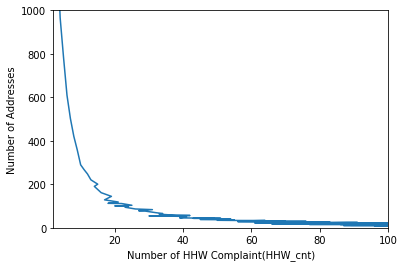

In [65]:
plt.plot(df['HHW_cnt'].value_counts())
plt.xlim(2, 100)
plt.ylim(0,1000)
plt.xlabel('Number of HHW Complaint(HHW_cnt)')
plt.ylabel('Number of Addresses')

### According the figure above, I am going to divide HHW_cnt (number of HHW complaints) into three ranges to reduce the catagories for classification: 0, 1~20, and above 20   

In [66]:
def cnt(x):
    if x ==0:
        range = 0
    elif 0 < x <= 20:
        range = 20
    else: 
        range = 50
    return range
df['HHW_cnt'] = df['HHW_cnt'].apply(cnt)

In [67]:
df['HHW_cnt'].value_counts().head(10)

0     68540
20    14050
50     4427
Name: HHW_cnt, dtype: int64

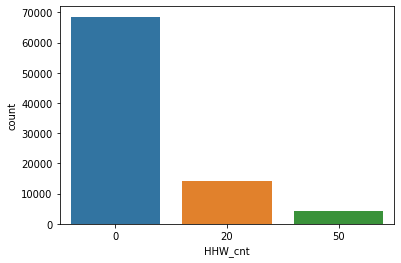

In [68]:
sns.countplot(df['HHW_cnt'])
#imbalanced data

### Feature selection with 1)correlation_matrix; 2)Recursive Feature Elimination; and 3)feature importance ranking.

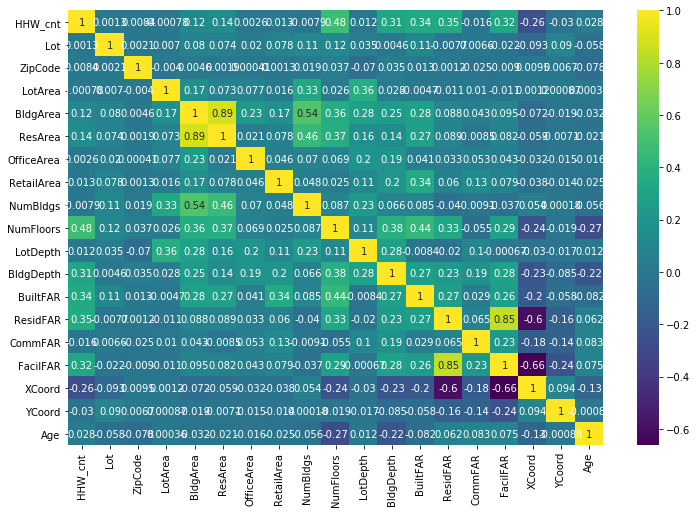

In [69]:
# 1) correlation matrix
corr_matrix = df.corr()
plt.figure(figsize =(12,8))
sns.heatmap(corr_matrix,cmap='viridis',annot=True)

'BldgArea' is highly correlated with 'ResArea', and 'ResidFAR' is highly correlated with 'FacilFAR'

In [70]:
# Drop one of two features that have a correlation higher than 0.85
# Drop 'ResArea' and 'FacilFAR'
df.drop(columns =['ResArea','FacilFAR'], inplace = True)

In [71]:
corr_matrix['HHW_cnt'].sort_values(ascending = False)

HHW_cnt       1.000000
NumFloors     0.479296
ResidFAR      0.346208
BuiltFAR      0.342443
FacilFAR      0.315650
BldgDepth     0.312032
ResArea       0.136755
BldgArea      0.117719
Age           0.027730
RetailArea    0.012937
LotDepth      0.012046
ZipCode       0.008400
OfficeArea    0.002560
Lot           0.001271
LotArea      -0.000785
NumBldgs     -0.007869
CommFAR      -0.016276
YCoord       -0.029850
XCoord       -0.258185
Name: HHW_cnt, dtype: float64

1) correlation_matrix shows NumFloors, ResidFAR, BuiltFAR, BldgDepth, XCoord are the most important features

In [72]:
# 2)Recursive Feature Elimination 
X = df.drop(columns =['Address','HHW_cnt'])
y = df['HHW_cnt']

In [73]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=0)
selector = RFE(estimator,n_features_to_select=10,step=1) # pick the most important ten features
selector = selector.fit(X, y)

In [74]:
print('Number of features:', selector.n_features_)
print('Selected features: ', selector.support_)
print('Feature Ranking: ', selector.ranking_)

Number of features: 10
Selected features:  [ True False  True  True False False False  True  True  True  True False
 False  True  True  True]
Feature Ranking:  [1 3 1 1 6 5 4 1 1 1 1 2 7 1 1 1]


2) RFE indicates the most important ten features are: Lot, LotArea, BldgArea,NumFloors, LotDepth, BldgDepth, BuiltFAR, XCoord, YCoord, Age

In [75]:
# 3)feature importance ranking with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
df_feature_importance = pd.DataFrame({'FeatureName': X.columns, 'FeatureRanking_RFE':selector.ranking_, 'FeatureImportance_RF':RF.feature_importances_})
df_feature_importance.sort_values('FeatureImportance_RF',ascending = False)

,FeatureName,FeatureRanking_RFE,FeatureImportance_RF
10,BuiltFAR,1,0.136971
13,XCoord,1,0.115457
14,YCoord,1,0.111045
3,BldgArea,1,0.106013
0,Lot,1,0.099535
9,BldgDepth,1,0.079726
7,NumFloors,1,0.077383
2,LotArea,1,0.070187
15,Age,1,0.056965
8,LotDepth,1,0.050792


### The Table above shows that both RFE and Random Forest models agree pretty well: the ten most important features are (in the order of importance): BuiltFAR, XCoord, YCoord, BldgArea, Lot, NumFloors, BldgDepth, LotArea, Age, LotDepth

## STEP 5: standarize and split train-test data

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
X_scaled = pd.DataFrame(StandardScaler().fit(X).transform(X),columns=X.columns)
X_scaled.head()

,Lot,ZipCode,LotArea,BldgArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,BuiltFAR,ResidFAR,CommFAR,XCoord,YCoord,Age
0,-0.117486,0.054346,0.008764,0.803298,-0.042652,-0.072233,-0.112618,2.504916,-0.079163,1.222536,2.126465,0.567523,-0.219946,-0.419144,-1.059765,0.159119
1,-0.224531,0.021862,0.037947,0.689980,-0.042652,-0.072233,-0.112618,1.820036,0.964342,1.386341,0.767685,1.342292,-0.219946,-1.055040,1.182379,0.307763
2,0.055608,0.000206,0.029236,0.674854,-0.042652,0.930239,-0.112618,2.504916,0.312151,2.434691,0.938913,1.342292,-0.219946,-1.089825,0.065330,0.258215
3,-0.217699,0.014643,0.025562,1.566404,-0.042652,-0.072233,-0.112618,6.614197,-0.079163,0.119475,2.905279,1.342292,-0.219946,1.194745,-0.178009,-0.559324
4,-0.181258,-0.021450,0.036262,1.732625,-0.042652,-0.072233,-0.112618,2.504916,0.258345,1.976038,2.634627,3.321406,-0.219946,-1.933260,-1.120419,0.010476


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

## STEP 6: Model selection with pipeline & GridSearchCV

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])
param_grid = [{'classifier': [RandomForestClassifier()],
               'classifier__n_estimators': [10,100,1000],
               'classifier__max_features': [10,'auto','sqrt'],
               'classifier__max_leaf_nodes': [2,5,10,None],
               'classifier__max_depth':[3,5,7,9,10],
               'classifier__min_samples_split':[2,4,6],
               'classifier__criterion': ['gini','entropy']}, 
              {'classifier': [LogisticRegression()],
               'classifier__penalty': ['l1','l2'],
               'classifier__C': np.linspace(0,4,10)},
              {'classifier':[SVC()],
               'classifier__C':[0.01,0.1,1,10],
               'classifier__gamma':['auto',1,0.1,10]}
             ]
grid = GridSearchCV(estimator=pipe,param_grid=param_grid,cv=5, verbose=3,n_jobs=-3)
model = grid.fit(X_train,y_train)

Fitting 5 folds for each of 1116 candidates, totalling 5580 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-3)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-3)]: Done 100 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-3)]: Done 260 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-3)]: Done 484 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-3)]: Done 772 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-3)]: Done 1124 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-3)]: Done 1540 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-3)]: Done 2020 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-3)]: Done 2564 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-3)]: Done 3172 tasks      | elapsed: 82.9min
[Parallel(n_jobs=-3)]: Done 3844 tasks      | elapsed: 103.2min
[Parallel(n_jobs=-3)]: Done 4580 tasks      | elapsed: 133.7min
[Parallel(n_jobs=-3)]: Done 5380 tasks      | elapsed: 165.4min
[Parallel(n_jobs=-3)]: Done 5580 out of 5580 | elapsed: 222.2min finished


In [83]:
print('Best Model with Parameters:{}'.format(model.best_params_,'\n'))
print('Best Accuracy Score is: {}'.format(model.best_score_))

Best Model with Parameters:{'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': 10, 'classifier__max_leaf_nodes': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 1000}
Best Accuracy Score is: 0.8239309757363648


In [84]:
y.value_counts(normalize = True)

0     0.787662
20    0.161463
50    0.050875
Name: HHW_cnt, dtype: float64

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     22685
          20       0.51      0.15      0.23      4574
          50       0.63      0.66      0.65      1457

    accuracy                           0.83     28716
   macro avg       0.67      0.60      0.60     28716
weighted avg       0.79      0.83      0.79     28716



The accuracy scores are better than dummy classifier

In [86]:
df_feature_importance = pd.DataFrame({'FeatureName': X.columns, 'FeatureImportance':\
                                      model.best_estimator_['classifier'].feature_importances_ })
df_feature_importance.sort_values('FeatureImportance',ascending = False)

,FeatureName,FeatureImportance
7,NumFloors,0.319980
10,BuiltFAR,0.202753
3,BldgArea,0.097817
9,BldgDepth,0.070553
15,Age,0.061051
13,XCoord,0.043907
2,LotArea,0.041946
14,YCoord,0.041602
11,ResidFAR,0.036158
0,Lot,0.024710


# QUESTION 3 CONCLUSION: 
# NumFloors, BuiltFAR, BldgArea,BldgDepth, Age are the top five housing characteristics that determins how many HEAT/HOT WATER complaints filed in total in BRONX.

## For Question 4, I am going to build a model to predict the total amount of HEAT/HOT WATER complaints in 2020

In [87]:
df_311.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status,Year
0,2020-08-17 17:06:01,47277816,PLUMBING,10468.0,95 WEST 195 STREET,WEST 195 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.869953,-73.899488,NaN,RESIDENTIAL BUILDING,0,2020
1,2020-08-17 10:12:47,47277264,PAINT/PLASTER,10303.0,55 HOLLAND AVENUE,HOLLAND AVENUE,ADDRESS,STATEN ISLAND,The following complaint conditions are still o...,STATEN ISLAND,40.638992,-74.171244,NaN,RESIDENTIAL BUILDING,0,2020
2,2020-08-17 13:47:57,47273051,WATER LEAK,11225.0,135 OCEAN AVENUE,OCEAN AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.659590,-73.962656,NaN,RESIDENTIAL BUILDING,0,2020
3,2020-08-17 12:56:24,47275668,ELECTRIC,10075.0,337 EAST 77 STREET,EAST 77 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.771623,-73.955048,NaN,RESIDENTIAL BUILDING,0,2020
4,2020-08-17 10:31:06,47274700,UNSANITARY CONDITION,10019.0,37 WEST 54 STREET,WEST 54 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.761600,-73.976684,NaN,RESIDENTIAL BUILDING,0,2020


In [88]:
df_311_HHW = df_311[df_311['complaint_type'] == 'HEAT/HOT WATER']
df_311_HHW.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status,Year
5,2020-08-17 08:29:20,47273334,HEAT/HOT WATER,11238.0,261 GATES AVENUE,GATES AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.685458,-73.957262,NaN,RESIDENTIAL BUILDING,0,2020
12,2020-08-17 18:57:38,47276192,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,WOODYCREST AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.831527,-73.928863,NaN,RESIDENTIAL BUILDING,0,2020
26,2020-08-17 19:23:18,47273350,HEAT/HOT WATER,10030.0,2480 ADAM C POWELL BOULEVARD,ADAM C POWELL BOULEVARD,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.821117,-73.939468,NaN,RESIDENTIAL BUILDING,0,2020
31,2020-08-17 14:48:16,47273026,HEAT/HOT WATER,11205.0,235 SKILLMAN STREET,SKILLMAN STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.691328,-73.956451,NaN,RESIDENTIAL BUILDING,0,2020
38,2020-08-17 22:10:31,47273173,HEAT/HOT WATER,11230.0,210 PARKVILLE AVENUE,PARKVILLE AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.631266,-73.970616,NaN,RESIDENTIAL BUILDING,0,2020


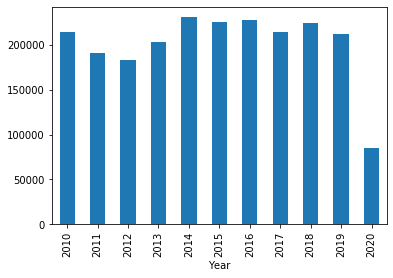

In [89]:
df_311_HHW.groupby('Year').count()['unique_key'].plot(kind ='bar')

In [90]:
df_311_HHW_cnt = df_311_HHW.groupby('Year').count().reset_index()[['Year','unique_key']]
df_311_HHW_cnt

,Year,unique_key
0,2010,214218
1,2011,190184
2,2012,182974
3,2013,202896
4,2014,230364
5,2015,225706
6,2016,227959
7,2017,213521
8,2018,223835
9,2019,212075


Text(0.5, 1.0, 'Total number of HEAT/HOT WATER complaints from 2010 t0 2019')

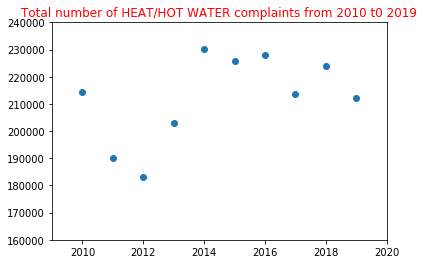

In [91]:
plt.scatter(df_311_HHW_cnt['Year'][:-1],df_311_HHW_cnt['unique_key'][:-1])
plt.xlim(2009,2020)
plt.ylim(160000,240000)
plt.title('Total number of HEAT/HOT WATER complaints from 2010 t0 2019', color ='r')

In [92]:
X = np.asarray(df_311_HHW_cnt['Year'][:-1]).reshape(-1,1)
y = df_311_HHW_cnt['unique_key'][:-1]

In [93]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)

In [94]:
X_poly = poly.fit_transform(X)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [96]:
linreg = LinearRegression()

In [97]:
model = linreg.fit(X_poly,y)

In [98]:
pred = model.predict(X_poly)

Text(0.5, 1.0, 'Total number of HEAT/HOT WATER complaints from 2010 t0 2019')

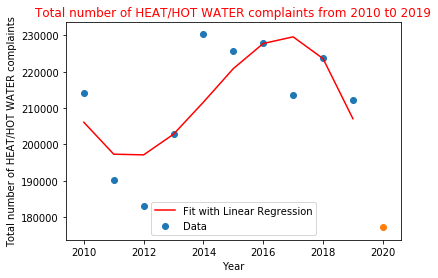

In [99]:
plt.plot(X, pred, color ='r', label = 'Fit with Linear Regression')
plt.scatter(df_311_HHW_cnt['Year'][:-1],df_311_HHW_cnt['unique_key'][:-1], label = 'Data')
plt.scatter(2020, model.predict(poly.fit_transform([[2020]])))
plt.xlabel('Year')
plt.ylabel('Total number of HEAT/HOT WATER complaints')
plt.legend()
plt.title('Total number of HEAT/HOT WATER complaints from 2010 t0 2019', color ='r')

In [100]:
# Predict the total number of HEAT/HOT WATER complaints in 2020
model.predict(poly.fit_transform([[2020]]))

array([177181.67163086])

# CONCLUSION for Question 4: 
# A model can be built to predict total number of HEAT/HOT WATER complaints in the future. The model predicts 177181 total HEAT/HOT WATER complaints in 2020. 